<a href="https://colab.research.google.com/github/lalearp/covid19-genome-analysis/blob/main/covid19_genome_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO
from Bio.Seq import Seq
from collections import Counter
import requests

In [2]:
%pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 29.2 MB/s eta 0:00:00


In [6]:
def download_covid_genome():
    """Download COVID-19 reference genome from NCBI"""
    url = "https://www.ncbi.nlm.nih.gov/sviewer/viewer.fcgi?id=NC_045512.2&db=nuccore&report=fasta"
    response = requests.get(url)
    with open('covid_reference.fasta', 'w') as f:
        f.write(response.text)
    print("✅ COVID-19 reference genome downloaded!")

In [9]:
def analyze_genome_composition(filename):
    """Analyze nucleotide composition of genome"""
    record = SeqIO.read(filename, "fasta")
    sequence = str(record.seq)
    composition = Counter(sequence)
    total_length = len(sequence)
    composition_pct = {base: (count/total_length)*100
                      for base, count in composition.items()}
    plt.figure(figsize=(10, 6))
    bases = list(composition_pct.keys())
    percentages = list(composition_pct.values())
    plt.subplot(1, 2, 1)
    plt.bar(bases, percentages, color=['red', 'blue', 'green', 'orange'])
    plt.title('SARS-CoV-2 Nucleotide Composition')
    plt.ylabel('Percentage (%)')
    gc_content = (composition_pct.get('G', 0) + composition_pct.get('C', 0))
    plt.subplot(1, 2, 2)
    plt.pie([gc_content, 100-gc_content],
            labels=[f'GC ({gc_content:.1f}%)', f'AT ({100-gc_content:.1f}%)'],
            autopct='%1.1f%%', startangle=90)
    plt.title('GC vs AT Content')
    plt.tight_layout()
    plt.show()
    return composition_pct, gc_content

In [10]:
def find_orfs(sequence, min_length=100):
    """Find open reading frames in the sequence"""
    start_codon = 'ATG'
    stop_codons = ['TAA', 'TAG', 'TGA']
    orfs = []

    for frame in range(3):
        for i in range(frame, len(sequence) - 2, 3):
            codon = sequence[i:i+3]
            if codon == start_codon:
                for j in range(i+3, len(sequence) - 2, 3):
                    next_codon = sequence[j:j+3]
                    if next_codon in stop_codons:
                        orf_length = j - i
                        if orf_length >= min_length:
                            orfs.append({
                                'start': i,
                                'end': j,
                                'length': orf_length,
                                'frame': frame
                            })
                        break

    return orfs

🧬 Starting COVID-19 Genome Analysis...
✅ COVID-19 reference genome downloaded!


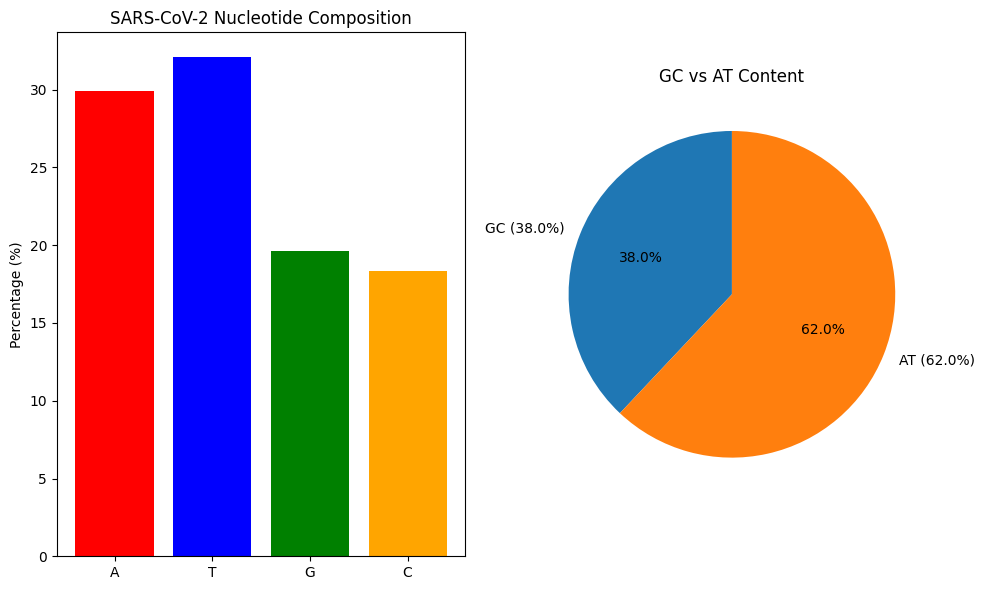

📊 Genome GC content: 37.97%


In [11]:
print("🧬 Starting COVID-19 Genome Analysis...")
download_covid_genome()
composition, gc_content = analyze_genome_composition('covid_reference.fasta')
print(f"📊 Genome GC content: {gc_content:.2f}%")